In [1]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [97]:
df = pd.read_excel('DAT_XLSX_EURUSD_M1_2018.xlsx', header=None)
df.columns = ['time', 'high', 'open', 'close', 'low', 'volume']
df.set_index('time', inplace=True)
df.to_period('min')
df.drop('volume', axis=1, inplace=True)
df = df.asfreq('D').dropna()
df

,high,open,close,low
time,,,,
2018-01-01 17:00:00,1.20037,1.20100,1.20037,1.20100
2018-01-02 17:00:00,1.20571,1.20576,1.20571,1.20571
2018-01-03 17:00:00,1.20135,1.20138,1.20129,1.20133
2018-01-04 17:00:00,1.20666,1.20666,1.20660,1.20660
2018-01-07 17:00:00,1.20260,1.20264,1.20259,1.20262
...,...,...,...,...
2018-12-20 17:00:00,1.14454,1.14454,1.14450,1.14454
2018-12-23 17:00:00,1.13692,1.13703,1.13692,1.13703
2018-12-26 17:00:00,1.13507,1.13518,1.13504,1.13518


In [98]:
to_model = df[['close']].reset_index()
to_model.columns = ['ds', 'y']
train_size = 0.7
split = int(len(to_model)*train_size)
train = to_model[:split]
test = to_model[split:]

In [99]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [100]:
future = m.make_future_dataframe(periods = 32020, freq='5min')
future.tail()

,ds
32192,2018-12-29 21:00:00
32193,2018-12-29 21:05:00
32194,2018-12-29 21:10:00
32195,2018-12-29 21:15:00
32196,2018-12-29 21:20:00


In [101]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01 17:00:00,1.196526,1.187390,1.206930,1.196526,1.196526,0.000990,0.000990,0.000990,0.000990,0.000990,0.000990,0.0,0.0,0.0,1.197516
1,2018-01-02 17:00:00,1.198060,1.188107,1.207382,1.198060,1.198060,-0.000327,-0.000327,-0.000327,-0.000327,-0.000327,-0.000327,0.0,0.0,0.0,1.197733
2,2018-01-03 17:00:00,1.199594,1.189522,1.208427,1.199594,1.199594,-0.000703,-0.000703,-0.000703,-0.000703,-0.000703,-0.000703,0.0,0.0,0.0,1.198892
3,2018-01-04 17:00:00,1.201129,1.190778,1.209878,1.201129,1.201129,-0.000967,-0.000967,-0.000967,-0.000967,-0.000967,-0.000967,0.0,0.0,0.0,1.200161
4,2018-01-07 17:00:00,1.205732,1.195662,1.215253,1.205732,1.205732,-0.000268,-0.000268,-0.000268,-0.000268,-0.000268,-0.000268,0.0,0.0,0.0,1.205464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32192,2018-12-29 21:00:00,1.135306,1.052242,1.205054,1.054813,1.204432,0.000312,0.000312,0.000312,0.000312,0.000312,0.000312,0.0,0.0,0.0,1.135618
32193,2018-12-29 21:05:00,1.135305,1.054460,1.204753,1.054809,1.204435,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,0.0,0.0,0.0,1.135610
32194,2018-12-29 21:10:00,1.135304,1.056185,1.205265,1.054804,1.204438,0.000298,0.000298,0.000298,0.000298,0.000298,0.000298,0.0,0.0,0.0,1.135603
32195,2018-12-29 21:15:00,1.135304,1.054212,1.205325,1.054800,1.204442,0.000292,0.000292,0.000292,0.000292,0.000292,0.000292,0.0,0.0,0.0,1.135595


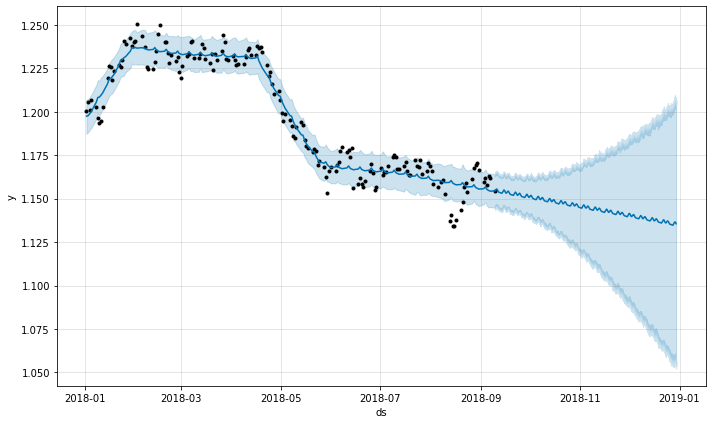

In [102]:
_ = m.plot(forecast)

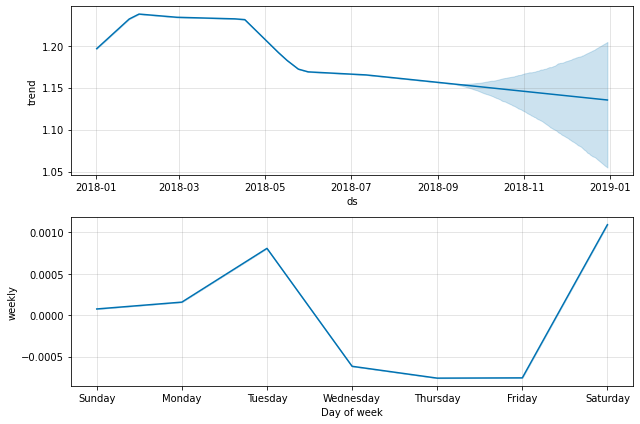

In [103]:
_ = m.plot_components(forecast)

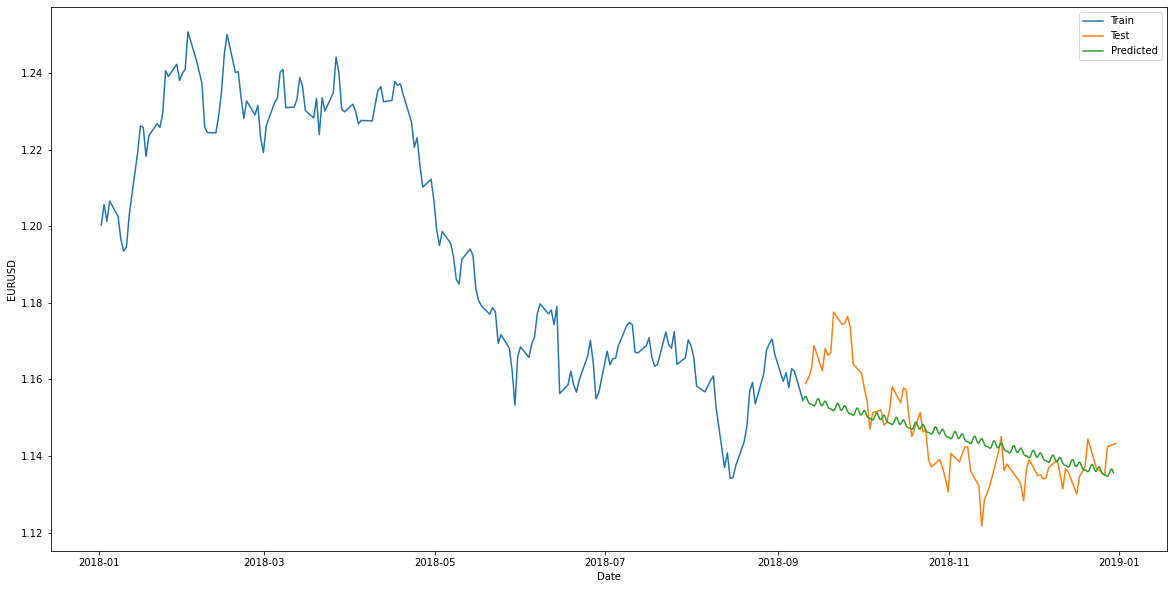

In [106]:
train.set_index('ds', inplace=True)
test.set_index('ds', inplace=True)
plt.figure(figsize=(20, 10))
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
pred = forecast[['ds', 'yhat']].set_index('ds')
pred = pred[pred.index > train.index[-1]]
plt.plot(pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('EURUSD')
plt.legend()